In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

ds = pd.read_csv('ProcessedData.csv')
ds

,FILE,PERSON,ORG,GPE,YEAR,AGENCY
0,FBI1,abu hafs,cia,montreal,2003.0,FBI
1,FBI2,riyad yasser,heston,london,2003.0,FBI
2,FBI3,abu somad,bafaba,omar evertts,2003.0,FBI
3,FBI4,abu hafs,drexel,chicago,2003.0,FBI
4,FBI5,rifai qasim,hezbollah,charlotte nc,2003.0,FBI
...,...,...,...,...,...,...
106,NSA18,NaN,plasencia st havana,pakistan,NaN,NSA
107,NSA19,riyad,bogota columbia,tampico mexico,2004.0,NSA
108,NSA20,NaN,NaN,pakistan,2004.0,NSA
109,NSA21,cuidad acuna,bogota columbia,bogota,2004.0,NSA


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILE    111 non-null    object 
 1   PERSON  88 non-null     object 
 2   ORG     94 non-null     object 
 3   GPE     108 non-null    object 
 4   YEAR    90 non-null     float64
 5   AGENCY  111 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.3+ KB


In [ ]:
ds['YEAR'] = ds['YEAR'].fillna(0)
ds['YEAR'] = ds['YEAR'].astype(int)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FILE    111 non-null    object
 1   PERSON  88 non-null     object
 2   ORG     94 non-null     object
 3   GPE     108 non-null    object
 4   YEAR    111 non-null    int64 
 5   AGENCY  111 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ds['PERSON'] = le.fit_transform(ds['PERSON'])
ds['ORG'] = le.fit_transform(ds['ORG'])
ds['GPE'] = le.fit_transform(ds['GPE'])
ds['AGENCY'] = le.fit_transform(ds['AGENCY'])
ds['YEAR'] = le.fit_transform(ds['YEAR'])

In [ ]:
print(ds.shape)
ds.describe

(111, 6)


<bound method NDFrame.describe of       FILE  PERSON  ORG  GPE  YEAR  AGENCY
0     FBI1       7   13   39    10       2
1     FBI2      55   25   34    10       2
2     FBI3       8    6   43    10       2
3     FBI4       7   18   19    10       2
4     FBI5      52   26   17    10       2
..     ...     ...  ...  ...   ...     ...
106  NSA18      64   36   44     0       3
107  NSA19      53    8   51    11       3
108  NSA20      64   58   44    11       3
109  NSA21      25    8    9    11       3
110  NSA22      49   12   26    11       3

[111 rows x 6 columns]>

In [ ]:
feature_names = ['PERSON', 'ORG', 'GPE', 'YEAR', 'AGENCY']
X = ds[feature_names].values

In [ ]:
scaled_data = preprocessing.scale(X)
print(scaled_data)
print(len(scaled_data))

[[-1.43552196 -0.94250328  0.41850755  0.50113212  0.4596459 ]
 [ 0.79565103 -0.30329026  0.1263419   0.50113212  0.4596459 ]
 [-1.38903919 -1.31537754  0.65224006  0.50113212  0.4596459 ]
 [-1.43552196 -0.67616452 -0.75015503  0.50113212  0.4596459 ]
 [ 0.65620272 -0.25002251 -0.86702129  0.50113212  0.4596459 ]
 [-0.22696993 -0.94250328 -0.75015503 -0.20299023  0.4596459 ]
 [-1.71441859 -1.04903879  1.29500448  0.50113212  0.4596459 ]
 [-0.36641824 -0.46309352  1.528737    0.50113212  0.4596459 ]
 [ 1.02806488 -1.52844855  1.23657135  0.50113212  0.4596459 ]
 [-0.50586655 -1.3686453  -0.63328878  0.50113212  0.4596459 ]
 [-0.2734527  -0.62289677 -0.51642252 -1.84594238  0.4596459 ]
 [ 1.1675132  -0.62289677 -0.10739062 -1.84594238  0.4596459 ]
 [ 0.74916826  0.97513578  1.23657135  0.50113212  0.4596459 ]
 [-1.29607365 -0.62289677 -0.69172191  0.50113212  0.4596459 ]
 [-0.18048715  1.24147454  0.30164129  0.73583958  0.4596459 ]
 [-1.34255642  1.45454554  0.18477503  0.50113212  0.45

In [ ]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
for i in pca_data:
  print(i, i[0])

[-1.06403476 -0.33027734 -0.36557784 -1.41810897  0.44794952] -1.0640347608082321
[ 0.10037098 -1.02592171  0.11517802  0.34324719 -0.09869793] 0.10037098282961233
[-1.16250712 -0.56173935 -0.46509433 -1.4237944   0.79812009] -1.1625071155574807
[-1.41853768  0.10206731  0.42597364 -1.13968393 -0.20015547] -1.4185376817816562
[-0.36024293 -0.66131954  0.79223039  0.48028592 -0.53087183] -0.36024292682386433
[-0.75430969 -0.19544902  0.96747851 -0.22271291  0.40279104] -0.7543096896451938
[-0.85762015 -0.49032079 -1.02089538 -1.84573066  0.8684941 ] -0.8576201526631249
[ 0.14322404 -0.94893852 -1.05509795 -0.89236765  0.56357194] 0.14322404076281584
[-0.0406801  -1.91949818 -0.44269632  0.3008862   1.18825425] -0.04068009635448127
[-1.39426082 -0.62592162  0.60899511 -0.42237911  0.32792238] -1.3942608182937752
[ 0.27668742  0.72566628  1.43322982 -0.38921995  1.24074947] 0.27668741593373825
[ 1.04692395 -0.05172945  1.38300797  0.61822982  1.40987693] 1.0469239543896502
[ 1.3210379  -0

In [ ]:
import csv
with open("/content/pcadata.csv", 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(['pc1', 'pc2', 'pc3', 'pc4', 'pc5']) 
        
    # writing the data rows 
    csvwriter.writerows(pca_data)

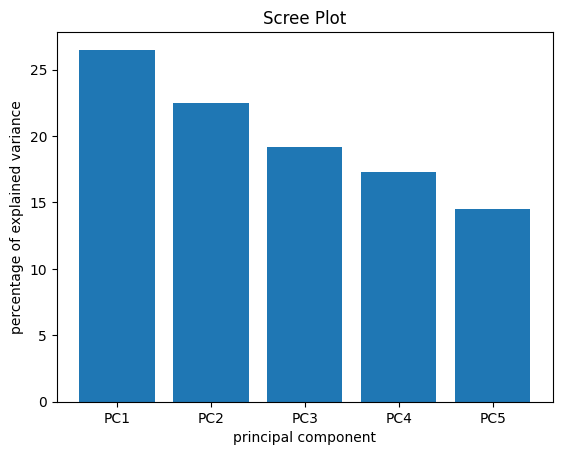

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

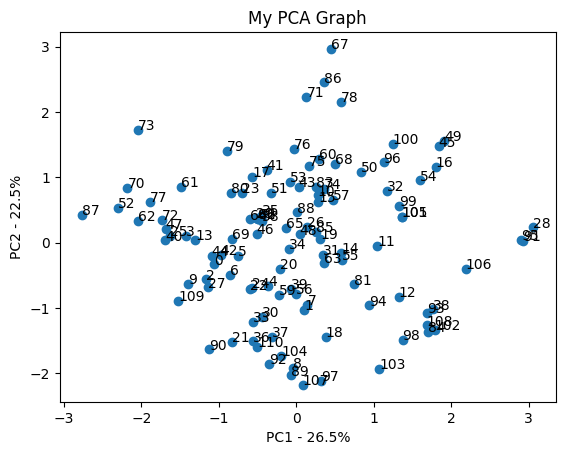

In [ ]:
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [ ]:
loading_scores = pd.Series(pca.components_[0], index=feature_names)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_2_att = sorted_loading_scores[0:2].index.values
print(loading_scores[top_2_att])

ORG     0.589612
YEAR   -0.462166
dtype: float64
